# EM算法

EM算法（expectation maximization algorithm）是具有浓厚概率论和数理统计学特点的算法，主要用于计算含有隐变量概率模型的极大似然估计。

我们先前在朴素贝叶斯和高斯判别模型中求参数的方法就是极大似然估计，但是我们学习到的是预测变量和观测变量之间的直接关系。如果观测的变量和我们要预测的变量没有直接的关系，观测到的变量通过影响隐含的变量（这个变量可以是具有实际意义但我们观测不到的，也可以是没有实际意义我们创造出来试图进行解释和改善模型的）再影响到预测变量的情况下，我们就需要用到EM算法。

## 一、直观理解

考虑如下例子：我们有A、B、C三枚硬币，进行如下实验，先掷硬币A，如果正面朝上掷硬币B，如果反面朝上则掷硬币C，三个硬币正面向上的概率分别为$\pi,p,q$。每次实验只记录最后的硬币结果，也就是我们不知道刚开始掷硬币A的结果，而只是通过最终的硬币向上的结果对三个参数进行估计。

假设结果如下：

$$
1,1,0,1,0,0,1,0,1,1
$$

设最终的输出结果为y，硬币A的中间结果为z，则模型可以描述如下：

$$
\begin{split}
    P(y|\theta) &= \sum_z P(y,z|\theta) = \sum_z P(z|\theta)P(y|z,\theta)\\
        &= \pi p^y(1-p)^{1-y} + (1-\pi) q^y(1-q)^{1-y}
\end{split}
$$

此处的$\theta$可以看作是广义的参数集合，y和z也可以看作是广义的预测变量和中间变量，而求和项则是针对隐变量所有的可能结果的求和,$\pi$和$(1-\pi)$分别是A正面和反面的概率$p^y(1-p)^{1-y}$和$q^y(1-q)^{1-y}$是硬币B和C掷出当前结果的概率，因此他们和$\pi$、$(1-\pi)$分别相乘就是已知实验结果的情况下硬币来自B和C的概率。

其似然函数为：

$$
\begin{split}
    L(Y|\theta) &= \prod_{j=1}^n \left(\sum_z P(z|\theta)P(y|z,\theta)\right) \\
        &= \prod_{j=1}^n\left[\pi p^{y_j}(1-p)^{1-y_j} + (1-\pi) q^{y_j}(1-q)^{1-y_j}\right]
\end{split}
$$

我们想要求的就是参数集合$\theta = \{\pi,p,q\}$的极大似然估计，也就是$\hat \theta = arg\ \underset{\theta}{max}\ ln\left(likelihood\right)$，因为似然函数累乘的内部是求和的形式，所以求对数后没办法直接展开求解析解，所以只能通过迭代求得数值解。EM就是求解的**其中一种**算法。

EM算法需要选取参数的初值，记为$\theta^{(0)} = \{\pi^{(0)},p^{(0)},q^{(0)}\}$，然后通过E步求期望，M步求极大似然估计来更新参数，直到参数收敛为止。设第i次迭代之后的估计值为$\theta^{(i)} = \{\pi^{(i)},p^{(i)},q^{(i)}\}$，EM算法的第i+1次迭代如下（之所以称次而不是步是因为一次迭代涉及两步）：

### E步：在已有观测数据y及第i步估计值$\theta=\theta^{(i)}$的条件下，求基于完全数据的对数似然函数的期望

$$
Q(\theta|y, \theta^{(i)}) = E_z\left[lnL(y,z|\theta^{(i)})\right]
$$

计算在模型参数$\theta^{(i)} = \{\pi^{(i)},p^{(i)},q^{(i)}\}$的情况下观测到数据$y_i$来自硬币B的概率（也就是隐变量）为：

$$
\hat \pi = \mu_j^{(i+1)} = \frac{\pi^{(i)} (p^{(i)})^{y_j}(1-p^{(i)})^{1-y_j}}{\pi^{(i)} (p^{(i)})^{y_j}(1-p^{(i)})^{1-y_j} + (1-\pi^{(i)}) (q^{(i)})^{y_j}(1-q)^{1-y_j}}
$$

其中分母是掷出当前结果（比如正面）的概率，分子是硬币B掷出当前结果的概率。所以这个分式就是观测到的数据来自硬币B的概率。

### M步：求$Q(\theta|y,\theta^{(i)})$关于$\theta$的最大值$\theta^{(i+1)}$

根据E步的概率求模型新的估计值

$$
\begin{split}
    \pi^{(i+1)} &= \frac1n\sum_{j=1}^n\mu_j^{(i+1)} \\
    \\
    p^{(i+1)} &= \frac{\sum_{j=1}^n\mu_j^{(i+1)}y_j}{\sum_{j=1}^n\mu_j^{(i+1)}}\\
    \\
    q^{(i+1)} &= \frac{\sum_{j=1}^n(1-\mu_j^{(i+1)})y_j}{\sum_{j=1}^n（1-\mu_j^{(i+1)}）}
\end{split}
$$

观测来自于硬币B的概率就等价于A掷出正面的概率，所以第一个等式很好理解。而第二个等式分母表示来自硬币B的概率和，分子表示来自硬币B且掷出正面的概率和。第三个等式和第二个含义相同。

假设模型的初值取$\pi^{(0)}=0.5,p^{(0)}=0.5,q^{(0)}=0.5$,有公式可得到稳定的极大似然估计值为：$\hat \pi=0.5,\hat p=0.6,\hat q=0.6$。

我们来实践一下

*本例来自李航《统计学习方法》p155-158*

In [14]:
import numpy as np

y = np.array([1,1,0,1,0,0,1,0,1,1]).reshape((10, 1))
theta = np.array([0.5, 0.5, 0.5]).reshape((3, 1)) # pi p and q
tmp = np.zeros((3, 1))
mu = 0

while np.sum(theta-tmp) > 1e-6:
    pi, p, q = theta[0], theta[1], theta[2]
    mu = np.array([pi*p**i*(1-p)**(1-i)/(pi*p**i*(1-p)**(1-i) + (1-pi)*q**i*(1-q)**(1-i)) for i in y]).reshape((10, 1))
    pi = np.mean(mu)
    p = np.sum(mu*y)/np.sum(mu)
    q = np.sum((1-mu)*y)/np.sum(1-mu)
    tmp = theta.copy()
    theta = np.array([pi, p, q])
    print(theta)

[0.5 0.6 0.6]
[0.5 0.6 0.6]


可以看到在第二次迭代的时候就已经稳定了，那么如果我们换一个初值呢？

用$\pi^{(0)}=0.4,p^{(0)}=0.6,q^{(0)}=0.7$进行尝试。

In [16]:
theta = np.array([0.4, 0.6, 0.7]).reshape((3, 1)) # pi p and q
tmp = np.zeros((3, 1))
mu = 0

while np.sum((theta-tmp)**2) > 1e-6:
    pi, p, q = theta[0], theta[1], theta[2]
    mu = np.array([pi*p**i*(1-p)**(1-i)/(pi*p**i*(1-p)**(1-i) + (1-pi)*q**i*(1-q)**(1-i)) for i in y]).reshape((10, 1))
    pi = np.mean(mu)
    p = np.sum(mu*y)/np.sum(mu)
    q = np.sum((1-mu)*y)/np.sum(1-mu)
    tmp = theta.copy()
    theta = np.array([pi, p, q])
    print(theta)

[0.40641711 0.53684211 0.64324324]
[0.40641711 0.53684211 0.64324324]


也是两步就稳定下来了，如果你有《统计学习方法》这本书会发现结论和书上的内容一致。

## 高斯混合模型

EM算法就和梯度下降一样，是一个优化算法，优化算法只有找到适合自己的模型才能发挥它的作用。高斯混合模型就是EM算法的一个主要用武之地。

高斯混合模型是用于聚类的算法，也就是监督学习算法。它假设数据是由K个高斯分布生成的，K就是我们希望聚类的类数，通过EM算法得到各个高斯分布的概率密度函数，最后根据样本点在哪个类的概率密度函数值乘上对应系数的值最大确定样本属于哪一类。

### 模型形式

高斯混合模型的模型形式为：

$$
P(x) = \sum_{j=1}^K \alpha_j \phi(x|\theta_j)
$$

其中$\alpha_j$是系数且大于零小于一，$\sum_{j=1}^K \alpha_j = 1$；$\phi(x|\theta_j)$是正态分布密度函数（也叫高斯分布），$\theta_j=(\mu_j, \sigma_j^2)$

$$
\phi(x|\theta_j) = \frac{1}{\sqrt{2\pi}\sigma_j}exp\left(-\frac{(x-\mu_j)^2}{2\sigma_j^2}\right)
$$

一般混合模型可以用任意分布函数替代模型中的高斯函数，后续推导根据函数性质略有不同。

由于$\sum_{j=1}^K \alpha_j = 1$，所以我们不难发现，高斯混合模型本质上是一个概率密度函数。



## 高斯混合模型的EM估计

假设观测数据$x_1, x_2, \dots, x_n$由高斯混合模型生成，

$$
P(x|\theta) = \sum_{j=1}^K\alpha_j \phi(x|\theta_j)
$$

其中$\theta = \{\alpha_1, \alpha_2, \dots, \alpha_K;\theta_1, \theta_2,\dots, \theta_K\}$，$\alpha_j$称为决定系数

设隐变量为：

$$
\gamma_{ij} = \begin{cases}
        1, &第i个观测来自第j个分模型\\
        0, &其他
    \end{cases}
$$

有了观测数据$x_i$及未观测数据$\gamma_{ij}$，那么完全数据是$\left(x_i,\gamma_{i1},\gamma_{i2},\dots,\gamma_{iK}\right)$

于是我们的似然函数就是：

$$
\begin{split}
    L(x,\gamma|\theta) &= \prod_{i=1}^N P(x_i,\gamma_{i1},\gamma_{i2},\dots,\gamma_{iK}|\theta)\\
        &= \prod_{i=1}^N \prod_{j=1}^K \left[\alpha_j \phi(x_i|\theta_j)\right]^{\gamma_{ij}}\\
\end{split}
$$

取对数之后：

$$
lnL(x,\gamma |\theta) = \sum_{i=1}^N \sum_{j=1}^K \left[\gamma_{ij}ln(\alpha_j)+\gamma_{ij}ln\left(\phi\left(x_i|\mu_j,\sigma_j\right)\right) \right]
$$

### E步：

对对数似然函数求期望：

$$
Q\left(\theta, \theta^{(i)}\right) = \sum_{i=1}^N \sum_{j=1}^K \left[E\left(\gamma_{ij}\right)ln(\alpha_j)+E\left(\gamma_{ij}\right)ln\left(\phi\left(x_i|\mu_j^{(i)},\left(\sigma_j^{(i)}\right)^2\right)\right) \right]
$$

回忆最开始的例子，E步需要计算第j个观测数据来自第k个高斯分布的概率，类比上例可以写作：

$$
\begin{split}
    \hat \gamma_{ij} &= E(\gamma_{ij}| x,\theta^{(i)})=P(\gamma_{ij}=1|x,\theta^{(i)}) \\
        \\
        &= \frac{P(\gamma_{ij}=1,x_i|\theta^{(i)})}{\sum_{j=1}^K P(\gamma_{ij}=1,x_i|\theta^{(i)})}\\
        \\
        &= \frac{P(x_i|\gamma_{ij}=1,\theta^{(i)})P(\gamma_{ij}=1|\theta^{(i)})}{\sum_{j=1}^K P(x_i|\gamma_{ij}=1,\theta^{(i)})P(\gamma_{ij}=1|\theta^{(i)})}\\
        \\
        &= \frac{\alpha_j\phi(x_i|\theta_j^{(i)})}{\sum_{j=1}^K\alpha_j\phi(x_i|\theta_j^{(i)})}
\end{split}
$$


### M步：

M步是求解参数的过程。参数主要分两类：一类是有约束和分模型无关的，也就是我们的决定系数$\alpha_j$；另一类是没有约束，能够决定单个分模型形状的概率分布参数$\theta_j = \{\mu_j,\sigma_j^2\}$

**决定系数**的求解是通过拉格朗日数乘法：

$$
\begin{split}
    &min\ Q(\theta, \theta^{(i)}) = \sum_{i=1}^N \sum_{j=1}^K \left[E\left(\gamma_{ij}\right)ln(\alpha_j)+E\left(\gamma_{ij}\right)ln\left(\phi\left(x_i|\mu_j^{(i)},\left(\sigma_j^{(i)}\right)^2\right)\right) \right]\\
    \\
    s.t.\ &\sum_{j=1}^K\alpha_j = 1 \\
    \\
    \Rightarrow &f\left(\theta^{(i)}, \lambda \right)=Q(\theta|x, \theta^{(i)}) + \lambda \left(1-\sum_{j=1}^K\alpha_j\right)\\
    \\
    \Rightarrow &\begin{cases}
        \frac{\partial f\left(\theta^{(i)}, \lambda \right)}{\partial \alpha_j} = \frac{\sum_{i=1}^N \gamma_{ij}}{\alpha_j}-\lambda = 0\\
        \frac{\partial f\left(\theta^{(i)}, \lambda \right)}{\partial \lambda} = 1-\sum_{j=1}^K\alpha_j
    \end{cases}\\
    \\
    \Rightarrow & \alpha_j = \frac{\sum_{i=1}^N \hat \gamma_{ij}}{\sum_{i=1}^N \sum_{j=1}^K \hat \gamma_{ij}}
\end{split}
$$

**分模型参数**是通过对对数似然函数求偏导，令其等于0得到：

$$
\begin{split}
    &ln\left(\phi\left(x_i|\mu_j^{(i)},\left(\sigma_j^{(i)}\right)^2\right)\right) = -\frac12 ln(2\pi) - \frac12 ln \left(\sigma_j^{(i)}\right)^2 - \frac{\left(x_i - \mu_j^{(i)}\right)^2}{2\left(\sigma_j^{(i)}\right)^2}\\
    \Rightarrow &\begin{cases}
        \frac{\partial ln\left(\phi\right)}{\partial \mu_j^{(i)}} = \frac{x_i - \mu_j^{(i)}}{\left(\sigma_j^{(i)}\right)^2} \\
        \frac{\partial ln\left(\phi\right)}{\partial \left(\sigma_j^{(i)}\right)^2} = -\frac12 \frac{1}{\left(\sigma_j^{(i)}\right)^2} + \frac{\left(x_i - \mu_j^{(i)} \right)}{2\left(\sigma_j^{(i)}\right)^4}
    \end{cases}
\end{split}
$$

因为我们是对第j个分模型求参数的偏导，所以与其无关的分模型就被视为常数，这样就能直接去掉内部从1到K的求和，并且这里的i有两个，一个是作为指示样本的第i个样本，另一个是指示迭代次数的第i次迭代，要区分对待。

$$
\frac{\partial Q}{\partial \mu_j^{(i)}} = \sum_{i=1}^N \hat \gamma_{ij}\frac{x_i - \mu_j^{(i)}}{\left(\sigma_j^{(i)}\right)^2}
$$

令其为0，解得：

$$
\hat \mu_j = \mu_j^{(i+1)} = \frac{\sum_{i=1}^N \hat\gamma_{ij}x_i}{\sum_{i=1}^N \hat \gamma_{ij}}
$$

同样对$\sigma$求导有：

$$
\frac{\partial Q}{\left(\sigma_j^{(i)}\right)^2} = \sum_{i=1}^N\gamma_{ij} \left[-\frac{1}{2\left(\sigma_j^{(i)}\right)^2}+\frac{\left(x_i - \mu_j^{(i)} \right)}{2\left(\sigma_j^{(i)}\right)^4}\right]
$$

令其等于0也有：

$$
\hat \sigma_j^2 = \frac{\sum_{i=1}^N \hat\gamma_{ij}\left(x_i - \mu_j^{(i)}\right)^2}{\sum_{i=1}^N \hat \gamma_{ij}}
$$

汇总一下：

$$
\begin{split}
    &\alpha_j = \frac{\sum_{i=1}^N \hat \gamma_{ij}}{\sum_{i=1}^N \sum_{j=1}^K \hat \gamma_{ij}}\\
    &\hat \mu_j = \frac{\sum_{i=1}^N \hat\gamma_{ij}x_i}{\sum_{i=1}^N \hat \gamma_{ij}}\\
    &\hat \sigma_j^2 = \frac{\sum_{i=1}^N \hat\gamma_{ij}\left(x_i - \mu_j^{(i)}\right)^2}{\sum_{i=1}^N \hat \gamma_{ij}}
\end{split}
$$

这就完成了一次迭代。但这是简单的一维情况，通常情况下我们进行聚类还是以二维坐标或者更高维的例子为主。这种情况下依然可以有类似于上述的推导，但是我的相关知识不一定能解释清楚，所以我就直接用一维的向多维的情况进行扩展。此时对于一个p维的高斯混合模型，其迭代结果为：

$$
\begin{split}
    &\alpha_j = \frac{\sum_{i=1}^N \hat \gamma_{ij}}{\sum_{i=1}^N \sum_{j=1}^K \hat \gamma_{ij}}\\
    &\hat \mu_j = \frac{\sum_{i=1}^N \hat\gamma_{ij}x_i}{\sum_{i=1}^N \hat \gamma_{ij}}\\
    &\hat \Sigma_j = \frac{\sum_{i=1}^N \hat\gamma_{ij}\left(x_i - \mu_j^{(i)}\right)\left(x_i - \mu_j^{(i)}\right)^T}{\sum_{i=1}^N \hat \gamma_{ij}}
\end{split}
$$

其中$\alpha$含义不变，仍是表示概率的实数。$x_i.\mu_j$都是p维列向量，$\Sigma$是$p \times p$维的协方差矩阵。如果你有一定的多元统计知识，对这种扩展应该能够理解。

*原先是准备按照李航的《统计学习方法》来完成推导，但是他的推导用的符号等等对于我来说接受比较困难，包括西瓜书也是，所以最后决定自己推导*

## 预测

通常我们聚类不仅仅是希望把手头的样本数据进行无标签的分类，更多时候我们希望通过聚类对样本进行一种归纳和总结，然后将新的数据归于其中一类，也就是预测。

这种预测我接触到的最大的用途就是填补缺失值，譬如我们的训练数据中有一列数据有缺失，我们需要补全缺失才能使模型正常工作（因为不管是NAN、None还是NULL在大部分编程语言中都是无法参与计算的）。这时候粗糙的补全方法就是连续变量用均值、离散变量用众数。

但如果我们希望用更精细的方法进行补全，聚类就是一个很好的途径。像Kmeans、高斯混合模型这些聚类的本质就是找到一组假设原型（prototype）对数据进行刻画。Kmeans的原型是各个类的样本中心，而GMM的原型就是模型的各个组成部分，即各个高斯分布。

当我们用GMM进行预测时，我们需要计算新样本属于每一类的概率值，然后将其划分至概率最高的那一类。计算时我们发现有两个选择，一是直接代入各个高斯分布，计算概率密度函数值进行比较；二是在上一步的基础上乘上决定系数$\alpha_i$再进行比较。正确的选择是第二种做法，我们可以这样理解，$\alpha_i$代表样本由各个分布产生的概率，所以我们进行比较的时候不但要计算在各个分模型中产生这个样本的概率，还要计算样本来自这个模型的概率。

用公式表示就是：

$$
\begin{split}
    P(y=i) &= \alpha_i \phi(y|\mu_i, \Sigma_i) \\
    \\
    \hat y &= \underset{i}{argmax} P(y=i)
\end{split}
$$

## 实验

实验将采用自己生成的二维数据进行聚类。这样可以保证迭代过程中的结果可视化。生成一个有协方差的二维的正态分布还需要一定的算法，暂时就用相互独立的正态分布二维数组代替。

In [87]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import copy

In [88]:
mu = [0,0]
sigma = [[1,0.5], [0.5, 1]]
np.random.multivariate_normal(mean=mu, cov=sigma, size=10)
#help(np.random.multivariate_normal)

array([[ 1.30482392,  0.21606989],
       [-0.94140543, -0.12730699],
       [ 0.17705639, -0.38788887],
       [ 0.45808672, -0.25490274],
       [-0.26954995,  0.27232996],
       [ 1.23130143, -0.94938901],
       [ 0.46884256,  0.47357112],
       [-0.35954475,  0.16750242],
       [-1.61170733, -1.59745802],
       [-0.54005553, -0.44964589]])

In [89]:
np.random.seed(2099)

mu = [[-1,-1],[5,1],[1, 5]]
sigma = [[[2, -0.5], [-0.5, 2]], [[1, 0.5], [0.5, 1]], [[1, 0.5], [0.5, 1]]]
data = np.array([0, 0]).reshape(1, 2)
for i in range(3):
    points = np.random.multivariate_normal(mean=mu[i], cov=sigma[i], size=50)
    data = np.vstack((data, points))

data = np.delete(data, 0, axis=0)

In [90]:
data.shape

(150, 2)

In [91]:
def pdf(x, mu, sigma) -> float:
    """
    x: a p*1 dimensional row vector
    mu: a p*1 dimensional row vector, representing mean vector
    sigma: a p*p dimensional covariance matrix
    return the value of probability density
    """
    try:
        p = x.shape[0]
        x = np.reshape(x, (p, 1))
    except AttributeError:
        p = len(x)
        x = np.reshape(x, (p, 1))
    # print(x)
    
    # computation = 1/(2pi^p/2 + |sigma|^1/2)
    computation = np.power(2*np.pi, -p/2)/np.power(np.linalg.det(sigma), 0.5)
    
    #tmp = -1/2 * (x-mu)' sigma^-1 (x-mu)
    tmp = np.dot((x-mu).T, np.linalg.inv(sigma))
    tmp = -np.dot(tmp, (x-mu))/2
    
    # computaion * exp(tmp)
    computation *= np.exp(tmp)
    
    return computation

x = np.array([0,0]).reshape(2, 1)
mu = np.array([0,0]).reshape(2, 1)
sigma = np.array([[1, 0], [0, 1]])

pdf(x, mu, sigma) # 1/2pi = 0.15915494

array([[0.15915494]])

In [92]:
# initialize the parameters
alpha = [0.2, 0.4, 0.4]
n_cluster = 3
cluster = {
    0: [np.array([1, 1]).reshape((2,1)), np.array([[0.7, 0.3], [0.3, 0.7]])],
    1: [np.array([2, 2]).reshape((2,1)), np.array([[0.6, 0.4], [0.4, 0.6]])],
    2: [np.array([3, 3]).reshape((2, 1)), np.array([[0.8, 0.2], [0.2, 0.8]])]
}

In [93]:
def e_step(alpha, cluster, x):
    """
    alpha: probability efficient
    cluster: a diction containing all the clusters' parameters
    x: data to cluster
    return: gamma: the i-th row and j-th column's element presents 
            the probability of i-th sample belong to j-th cluster
    """
    n, p = x.shape
    k = len(cluster)
    
    gamma = np.zeros((n, k))
    
    for i in range(n):
        for j in range(k):
            prob = pdf(x[i,:].reshape((p,1)), mu=cluster[j][0], sigma=cluster[j][1])
            # print(str(i)+" + "+str(j), prob)
            gamma[i][j] = alpha[j]*prob
    
    gamma = gamma/np.sum(gamma, axis=1).reshape((n, 1))
    
    return gamma

tmp = e_step(alpha, cluster, data)
print(tmp[0:10, :])
print(np.sum(tmp[0:10, :], axis=1))

[[9.98303303e-01 1.69563363e-03 1.06380072e-06]
 [9.64788809e-01 3.51699019e-02 4.12891350e-05]
 [9.97068874e-01 2.93078738e-03 3.38509087e-07]
 [9.99344901e-01 6.54015171e-04 1.08366723e-06]
 [9.93503833e-01 6.49250110e-03 3.66545326e-06]
 [9.87699057e-01 1.22963470e-02 4.59577547e-06]
 [9.95014350e-01 4.98230459e-03 3.34555732e-06]
 [9.99566631e-01 6.70288573e-05 3.66339801e-04]
 [9.99342013e-01 2.33046654e-04 4.24939916e-04]
 [9.91193278e-01 8.80444879e-03 2.27334083e-06]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [94]:
def m_step(gamma, x, cluster):
    """
    gamma: the i-th row and j-th column's element presents 
        the probability of i-th sample belong to j-th cluster
    x: data to be clustered
    cluster: the parameters after i-th iteration
    """
    n, p = x.shape
    tmp = np.sum(gamma, axis=0)
    # print(tmp)
    alpha = tmp/np.sum(gamma)
    for j in range(len(cluster)):
        cluster[j][1] = np.dot((x-cluster[j][0].T).T, gamma[:,j].reshape((n, 1))*(x-cluster[j][0].T))/tmp[j]
        
        cluster[j][0] = np.sum(gamma[:,j].reshape((n, 1))*x, axis=0)/tmp[j]
        cluster[j][0] = cluster[j][0].reshape((p, 1))
    return alpha, cluster

alpha, cluster = m_step(tmp, data, cluster)

In [95]:
def diff(pre_cluster, now_cluster, pre_alpha, now_alpha):
    n = len(pre_cluster)
    ans = np.sum(np.power(pre_alpha-now_alpha, 2))
    # print(pre_cluster)
    # print(cluster)
    for i in range(n):
        ans += np.sum(np.power(pre_cluster[i][0]-now_cluster[i][0], 2))
        # print(str(i)+" 0 ",ans)
        ans += np.sum(np.power(pre_cluster[i][1]-now_cluster[i][1], 2))
        # print(str(i)+" 1 ",ans)
    return ans

In [96]:
alpha = [0.3, 0.3, 0.4]
n_cluster = 3
cluster = {
    0: [np.array([1, 1]).reshape((2,1)), np.array([[0.7, 0.3], [0.3, 0.7]])],
    1: [np.array([3, 1]).reshape((2,1)), np.array([[0.6, 0.4], [0.4, 0.6]])],
    2: [np.array([1, 3]).reshape((2, 1)), np.array([[0.8, 0.2], [0.2, 0.8]])]
}
dif, iteration = 1, 0

while dif > 1e-6:
    print(iteration)
    iteration += 1
    pre_cluster = copy.deepcopy(cluster) 
    pre_alpha = alpha.copy()
    
    print(alpha)
    print(cluster)
    
    gamma = e_step(alpha, cluster, data)
    # print(gamma)
    alpha, cluster = m_step(gamma, data, cluster)
    
    dif = diff(pre_cluster, cluster, pre_alpha, alpha)

0
[0.3, 0.3, 0.4]
{0: [array([[1],
       [1]]), array([[0.7, 0.3],
       [0.3, 0.7]])], 1: [array([[3],
       [1]]), array([[0.6, 0.4],
       [0.4, 0.6]])], 2: [array([[1],
       [3]]), array([[0.8, 0.2],
       [0.2, 0.8]])]}
1
[0.25227719 0.36350805 0.38421476]
{0: [array([[-0.94015085],
       [-1.1290606 ]]), array([[4.89593644, 4.01957729],
       [4.01957729, 5.68940975]])], 1: [array([[4.70871414],
       [0.61540341]]), array([[5.17519599, 0.64406705],
       [0.64406705, 1.58334871]])], 2: [array([[0.89842806],
       [4.61334936]]), array([[2.21508384, 2.00289225],
       [2.00289225, 5.6129532 ]])]}
2
[0.24464568 0.36575251 0.38960181]
{0: [array([[-0.86593758],
       [-1.05515292]]), array([[1.69655003, 0.06170443],
       [0.06170443, 1.87307197]])], 1: [array([[4.60871231],
       [0.65139321]]), array([[2.97672254, 1.17745608],
       [1.17745608, 1.28086845]])], 2: [array([[0.88774234],
       [4.44370289]]), array([[2.02107524, 2.27823698],
       [2.27823698, 4.

可以看到，对于有明显分类的数据来说，高斯混合模型效果还是很好的，而且需要的迭代数也较少。

当数据较稠密不易分类时（比如均值为(1,1)(4,2)(2,4)时），则无论是迭代次数还是训练效果都会相应的打折扣

先前设置的生成数据的方差就是括号内的均值，导致性能比现在差很多（有兴趣可以试一下）。

In [97]:
n = len(cluster)
belong = []
print(data[0].shape)
pdf(data[0], cluster[0][0], cluster[0][1])

(2,)


array([[0.05127712]])

In [98]:
def predict(data, cluster):
    """
    data: data that needs clustered
    cluster: a diction containing all the Gaussian cluster information
    """
    n_cluster = len(cluster)
    belong = []
    for i in data:
        prob = [pdf(i, cluster[j][0], cluster[j][1]) for j in range(n_cluster)]
        belong.append(np.argmax(prob))
    return belong

index = predict(data, cluster)
index = np.reshape(index, (data.shape[0], 1))

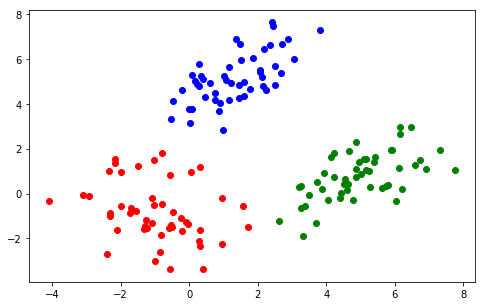

In [99]:
plt.figure(figsize=(8, 5))
plt.plot(data[:, 0][np.where(index==0)[0]], data[:, 1][np.where(index==0)[0]], "ro", color="red")
plt.plot(data[:, 0][np.where(index==1)[0]], data[:, 1][np.where(index==1)[0]], "ro", color="green")
plt.plot(data[:, 0][np.where(index==2)[0]], data[:, 1][np.where(index==2)[0]], "ro", color="blue")
plt.show()